DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has consistently paid attention to its customer experience so that customers will not be left behind.

Although only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of customers who switch (churn) by using machine learning.

After yesterday we prepared the data as well as performed Cleansing, now it's time for us to create the right model to predict customer churn.

The data details:

* UpdatedAt Periode of Data taken 
* customerID Customer ID
* gender Whether the customer is a male or a female (Male, Female)
* SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)
* Partner Whether the customer has a partner or not (Yes, No)
* tenure Number of months the customer has stayed with the company
* PhoneService Whether the customer has a phone service or not (Yes, No)
* InternetService Customer’s internet service provider (Yes, No)
* StreamingTV Whether the customer has streaming TV or not (Yes, No)
* PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
* MonthlyCharges The amount charged to the customer monthly
* TotalCharges The total amount charged to the customer
* Churn Whether the customer churned or not (Yes, No)


# 1. Import Library

In [20]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from sklearn import linear_model


# 2. Loading Dataset

In [21]:
# Loading dataset

df_load= pd.read_csv('/kaggle/input/dqlab-telco-customer-churn/dqlab_telco_final.csv')

df_load

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,202006,45437311872,Male,No,No,1,Yes,No,Yes,Yes,44.75,44.75,No
6946,202006,45184632574,Female,Yes,No,1,Yes,No,Yes,Yes,70.15,70.15,Yes
6947,202006,45023517923,Female,No,No,1,Yes,Yes,Yes,Yes,85.55,85.55,Yes
6948,202006,45665022680,Female,No,Yes,72,Yes,Yes,Yes,Yes,117.15,8529.50,No


In [22]:
df_load.shape

(6950, 13)

In [23]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [24]:
df_load.customerID.nunique()

6950

# 3. Visualizing Churn Precentage

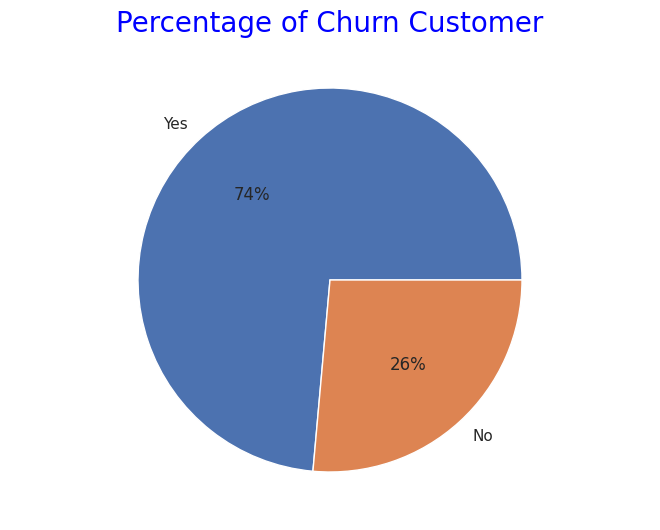

In [25]:
# Visualization

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Churn Customer', fontsize=20, color='blue')
plt.show()


# 4. Exploratory Data Analysis

# EDA Numerical Variable

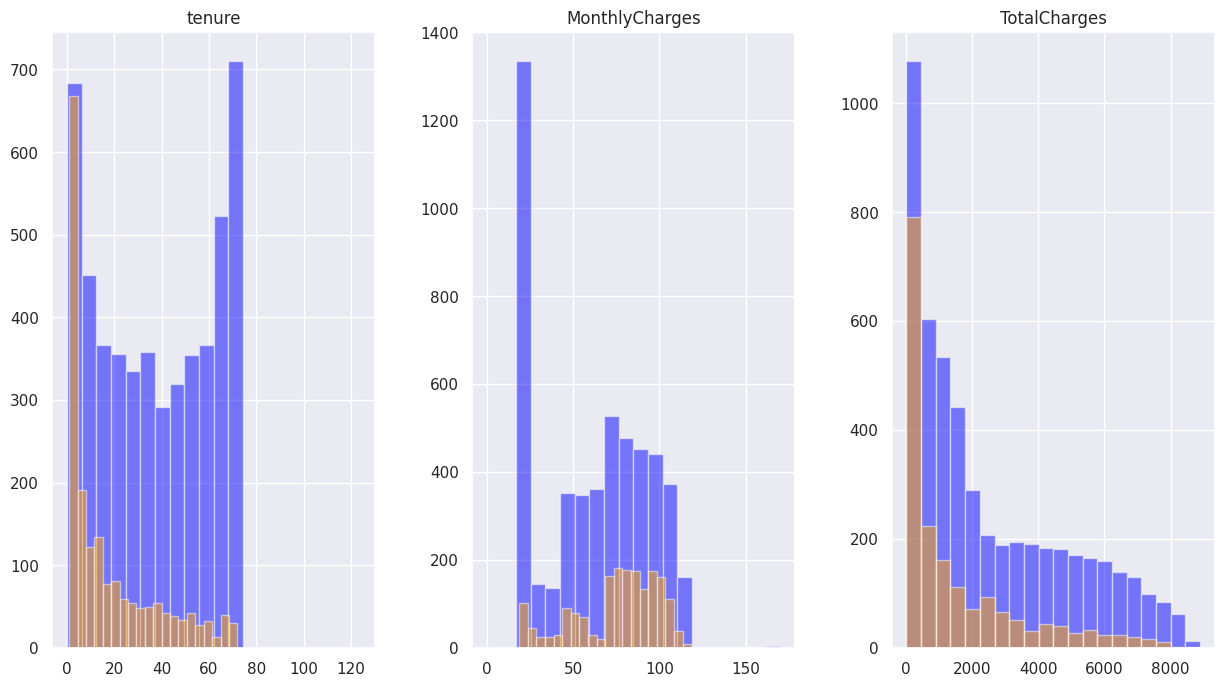

In [26]:
# Creating bin in chart
numerical_feature = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1,3, figsize=(15,8))

# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_feature].hist(bins = 20, color ='blue', alpha = 0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_feature].hist(bins = 20, color ='orange', alpha = 0.5, ax=ax)

plt.show()


# EDA Categorical Variable

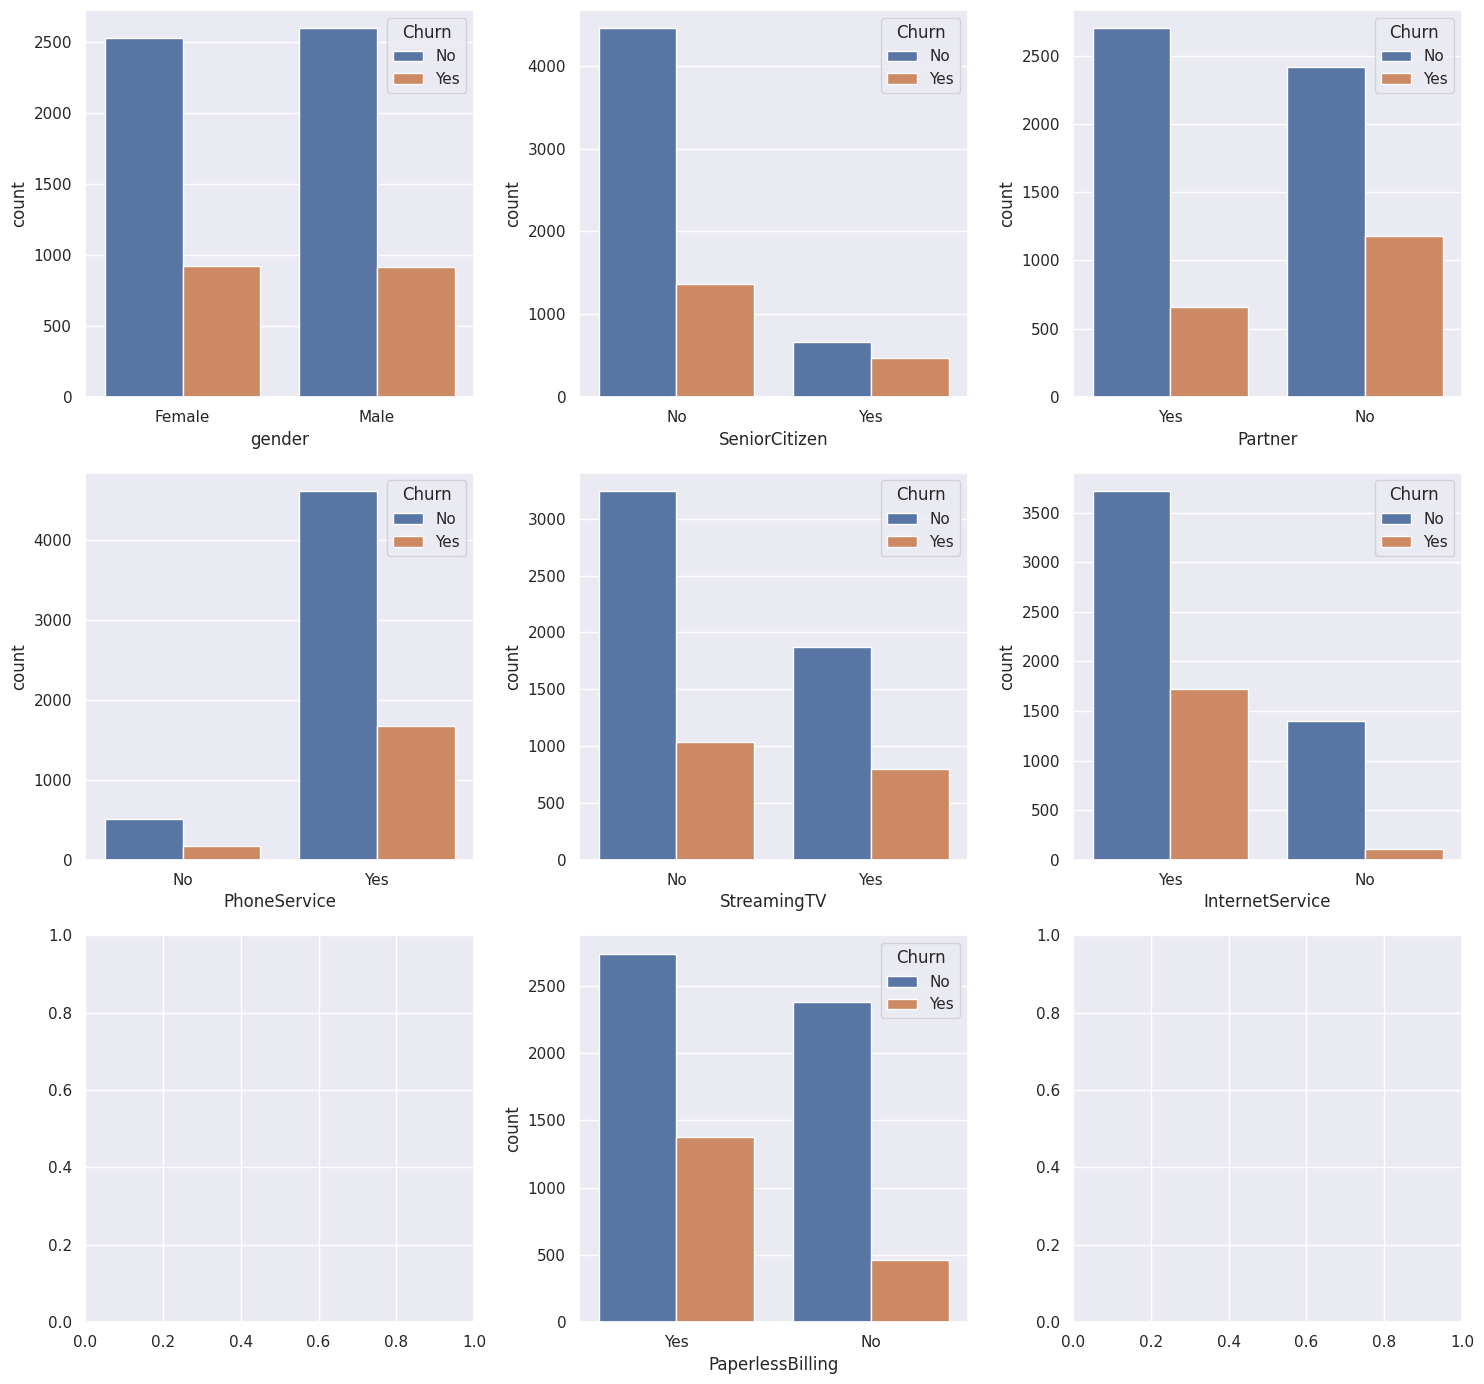

In [27]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,3, figsize=(15,14))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

# Insight: Based on the results and analysis above, it can be concluded:
- at stage C.1 we can know that the overall data distribution of customers does not churn, with details of Churn as much as 26% and No Churn as much as 74%.

- at stage C.2 we can know that for MonthlyCharges there is a tendency that the smaller the value of the monthly fee charged, the smaller the tendency to churn. For TotalCharges there does not seem to be any tendency towards churn customers. For Tenure, there is a tendency that the longer the customer's subscription, the smaller the tendency to churn.

- In stage C.3, we can see that there is no significant difference for people to churn based on gender and PhoneService. However, there is a tendency that people who churn are people who do not have a partner (partner: No), people whose status is senior citizen (SeniorCitizen: Yes), people who have streaming TV service (StreamingTV: Yes), people who have Internet service (internetService: Yes) and people whose billing is paperless (PaperlessBilling: Yes).

# 5. Data PreProcessing

In [28]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [29]:
# Encoding data

from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

/tmp/ipykernel_42/846532352.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipykernel_42/846532352.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipykernel_42/846532352.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipykernel_42/846532352.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipykernel_42/846532352.py:6: DeprecationWarning

In [30]:
# Splitting data

from sklearn.model_selection import train_test_split
# Predictor and target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Number of row and column from x_train is:', X_train.shape, 'whereas Number of row and column from y_train is:', y_train.shape)
print('Precentage of Churn in Training Data is:')
print(y_train.value_counts(normalize=True))
print('Number of row and column from x_test is:', X_test.shape, 'whereas Number of row and column from y_test is:', y_test.shape)
print('Precentage of Churn in Testing Data is:')
print(y_test.value_counts(normalize=True))

Number of row and column from x_train is: (4865, 10) whereas Number of row and column from y_train is: (4865,)
Precentage of Churn in Training Data is:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Number of row and column from x_test is: (2085, 10) whereas Number of row and column from y_test is: (2085,)
Precentage of Churn in Testing Data is:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


# Insight : 
After we analyze further, it turns out that there are columns that are not needed in the model, namely the customer Id Number (customerID) & the data retrieval period (UpdatedAt), so this needs to be deleted. Then we continue to change the value of the data which is still in the form of strings into numeric through encoding, after doing so, it can be seen in the distribution of the data, especially the min and max columns of each variable have changed to 0 & 1. The last stage is to divide the data into 2 parts for modeling purposes, after doing so, it can be seen that the number of rows and columns of each data is appropriate & the percentage of the churn column is also the same as the initial data, this indicates that the data is well separated and correct.

# 6. Modelling: Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
print('The Logistic Regression Model formed is : \n', log_model)


The Logistic Regression Model formed is : 
 LogisticRegression(max_iter=1000, random_state=0)


In [32]:
# Training Model Performance - Display Metric
from sklearn.metrics import confusion_matrix, classification_report
# Predict
y_train_pred = log_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865



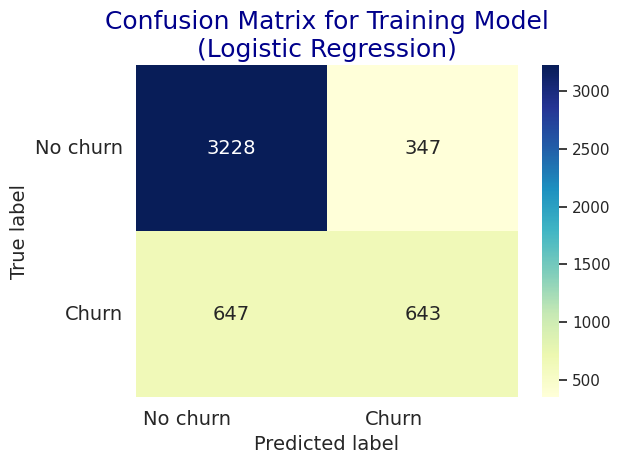

In [33]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


In [34]:
# Testing Data Performance - Display Metric
# Predict
y_test_pred = log_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



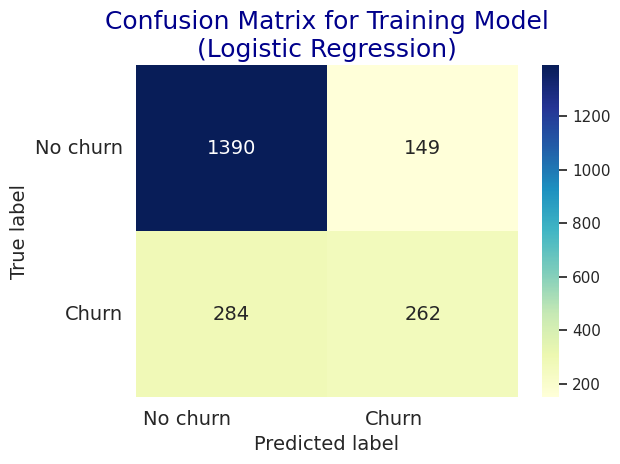

In [35]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

# Insight : 
From the results and analysis above, then:
* If we use the logistic regression algorithm by calling LogisticRegression() from sklearn without adding any parameters, then what is produced is a model with the default settings from sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict data by producing an accuracy of 80%, with details of churn guesses that are actually true churn is 638, guesses not churn that are not actually churn is 3237, guesses not churn that are actually true churn is 652 and guesses churn that are not actually churn is 338.

* From the testing data, it can be seen that the model is able to predict the data by producing an accuracy of 79%, with the details of the churn guess that is actually true churn is 264, the guess of not churn that is actually not churn is 1392, the guess of not churn that is actually true churn is 282 and the guess of churn that is actually not churn is 146.


# 7.	Modelling : Random Forest Classifier

In [37]:
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)


RandomForestClassifier()


In [38]:
rdf_model = RandomForestClassifier().fit(x_train, y_train)

y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       0.99      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



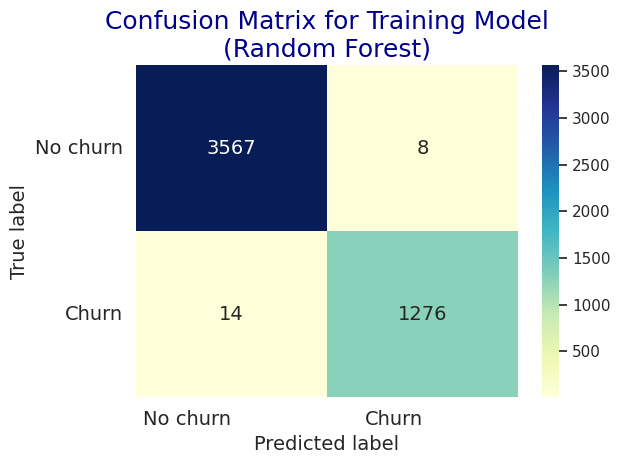

In [39]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [40]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))


Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.59      0.48      0.53       546

    accuracy                           0.77      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



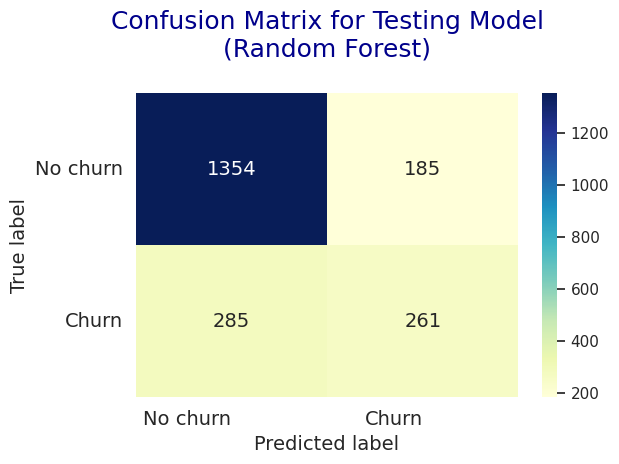

In [41]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


# Insight :
From the results and analysis above, then:
* If we use the Random Forest algorithm by calling RandomForestClassifier() from sklearn without adding any parameters, then what is produced is a model with the default settings from sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict data by producing 100% accuracy, with details of churn guesses that are actually true churn is 1278, not churn guesses that are actually not churn is 3566, not churn guesses that are actually true churn is 12 and churn guesses that are actually not churn is 9.

* From the testing data, it can be seen that the model is able to predict the data by producing an accuracy of 78%, with the details of the churn guess that is actually true churn is 262, the guess not churn that is actually not churn is 1360, the guess not churn that is actually true churn is 284 and the guess churn that is actually not churn is 179.

# 8. Modelling: Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)


GradientBoostingClassifier()


In [44]:
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



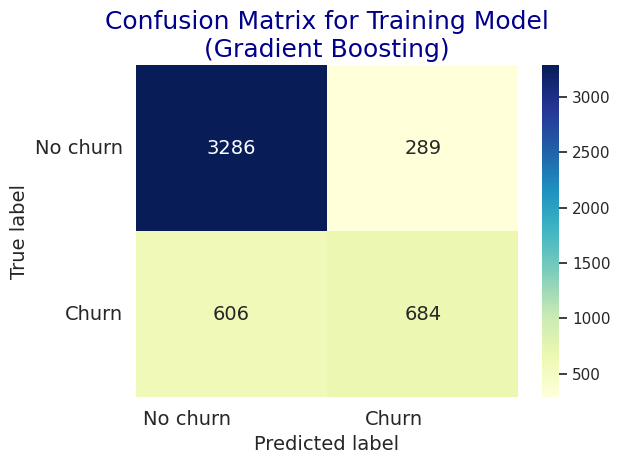

In [45]:
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
y_train_pred = gbt_model.predict(x_train)

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


In [47]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



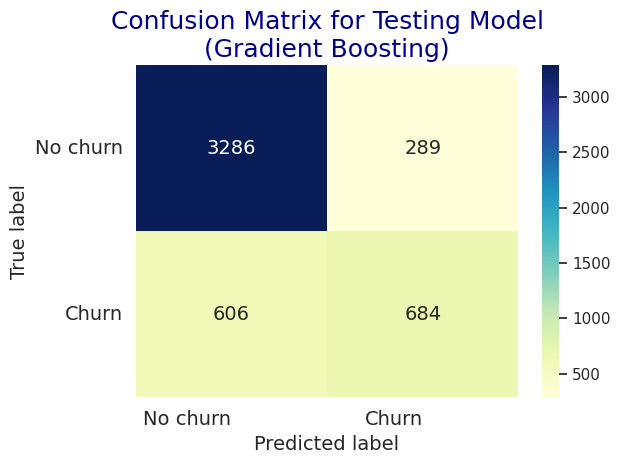

In [48]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()

# Insight :
From the results and analysis above, then:
* If we use the Gradient Boosting algorithm by calling GradientBoostingClassifier() from the sklearn package without adding any parameters, then what is produced is a model with the default settings from sklearn, for details can be seen in the documentation.

* From the training data, it can be seen that the model is able to predict data by producing an accuracy of 82%, with details of churn guesses that are actually true churn are 684, guesses of not churn that are not actually churn are 3286, guesses of not churn that are actually true churn are 606 and guesses of churn that are not actually churn are 289.

* From the testing data, it can be seen that the model is able to predict the data by producing an accuracy of 79%, with the details of the churn guess that is actually true churn is 261, the guess not churn that is actually not churn is 1394, the guess not churn that is actually true churn is 285 and the guess churn that is actually not churn is 145.

# The Conclusion
****Based on the modeling that has been done using Logistic Regression, Random Forest and Extreme Gradiant Boost, it can be concluded that to predict the churn of telco customers using this dataset, the best model is to use the Logistic Regression algorithm. This is because the performance of the Logistic Regression model tends to be able to predict equally well in the training and testing phases (80% training accuracy, 79% testing accuracy), on the other hand other algorithms tend to over-fit their performance. However, this does not allow us to conclude that if Logistic Regression is used for any modeling, we still have to do a lot of model experiments to determine which one is the best.****